In [1]:
import sys
sys.path.append('..')
import warnings
warnings.filterwarnings('ignore')
import Bio.PDB
parser = Bio.PDB.MMCIFParser()
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Test data

### PDBx/mmCIF file of 1A0R protein 

In [2]:
with open("./test_data/1a0r.cif", "r") as handle:
    print(handle.readline())

data_1A0R



### Select chain B of 1A0R

In [3]:
chain_1a0rB = None
with open("./test_data/1a0r.cif", "r") as handle:
    structure = parser.get_structure("1a0r",handle)
    
    # Get structure chains
    for chain in structure[0]:
        if chain.id == 'B':
            chain_1a0rB = chain
            
print(chain_1a0rB)

<Chain id=B>


# Data Representation Test Report

In [4]:
from utils import preprocess
import utils

## Data type, shape test & visualization

**For Xal:**<br>
input dtype: Chain<br>
output dtype: numpy.ndarray<br>
output(shape: (12,12,5))

In [5]:
xal = preprocess.generate_XAL_reg(chain_1a0rB)
print("Data Type:",type(xal))
print("Shape: ",xal.shape)

Data Type: <class 'numpy.ndarray'>
Shape:  (12, 12, 5)


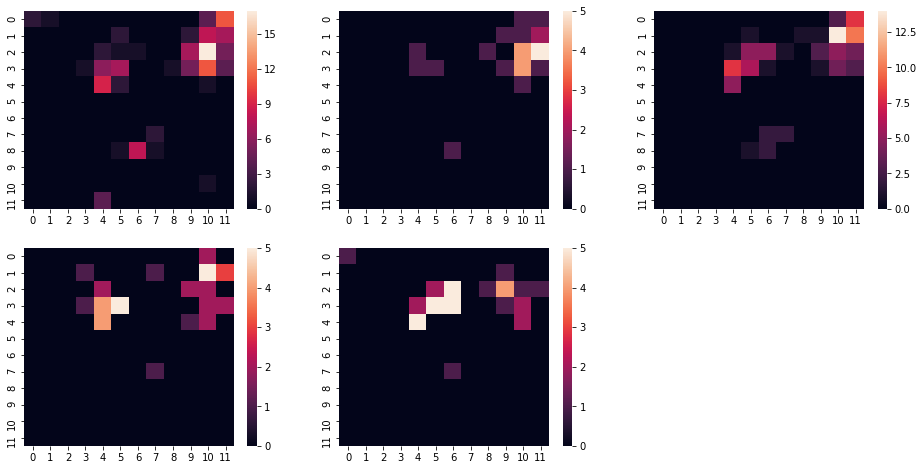

In [6]:
fig = plt.figure(figsize=(16,8))
for i in range(5):
    fig.add_subplot(2,3,i+1)
    sns.heatmap(xal[:,:,i])

**For Xdl:**<br>
input dtype: Chain<br>
output dtype: numpy.ndarray<br>
output(shape: (20,15))

In [7]:
xdl = preprocess.generate_XDL_reg(chain_1a0rB)
print("Data Type:",type(xdl))
print("Shape: ",xdl.shape)

Data Type: <class 'numpy.ndarray'>
Shape:  (20, 15)


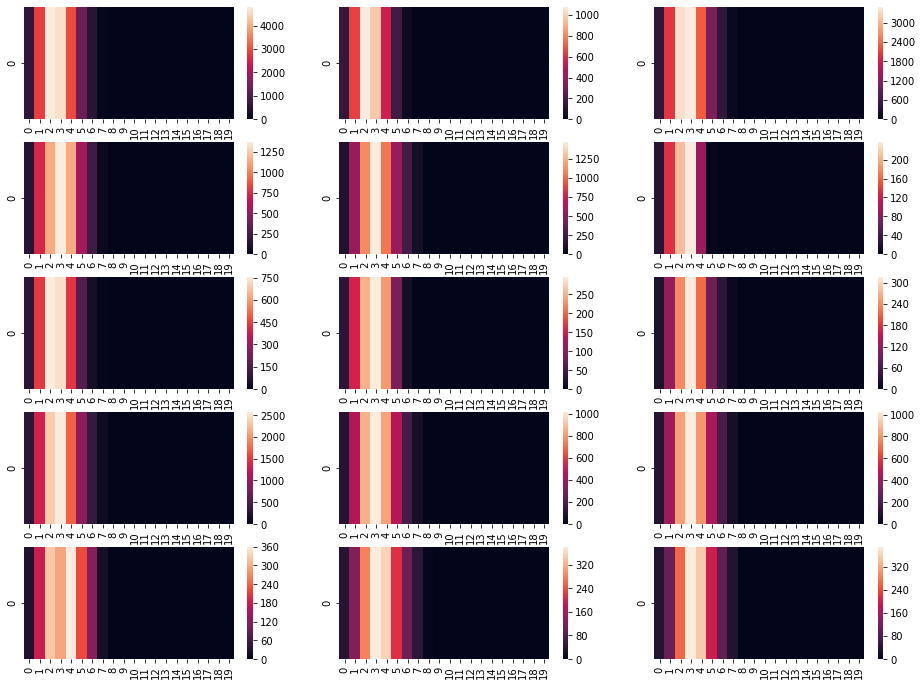

In [8]:
fig = plt.figure(figsize=(16,12))
for i in range(15):
    fig.add_subplot(5,3,i+1)
    sns.heatmap(np.expand_dims(xdl[:,i], 0) )